In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data
body_data = pd.read_csv('weights_and_heights.csv')
body_data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# inspect data
print(body_data.describe())
print('\n')
print(body_data['Gender'].value_counts())

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


Male      5000
Female    5000
Name: Gender, dtype: int64


In [4]:
# split data
male = body_data[body_data['Gender'] == 'Male']
female = body_data[body_data['Gender'] == 'Female']

In [5]:
# sample data
male_sample = male.sample(200, random_state = 42)
female_sample = female.sample(200)

# create variables
median_weight = male_sample['Weight'].median()
median_height = male_sample['Height'].median()
min_weight = male_sample['Weight'].min()
min_height = male_sample['Height'].min()

In [6]:
# single out one patient
patient = male_sample.loc[[705]]
patient

,Gender,Height,Weight
705,Male,67.121503,167.191527


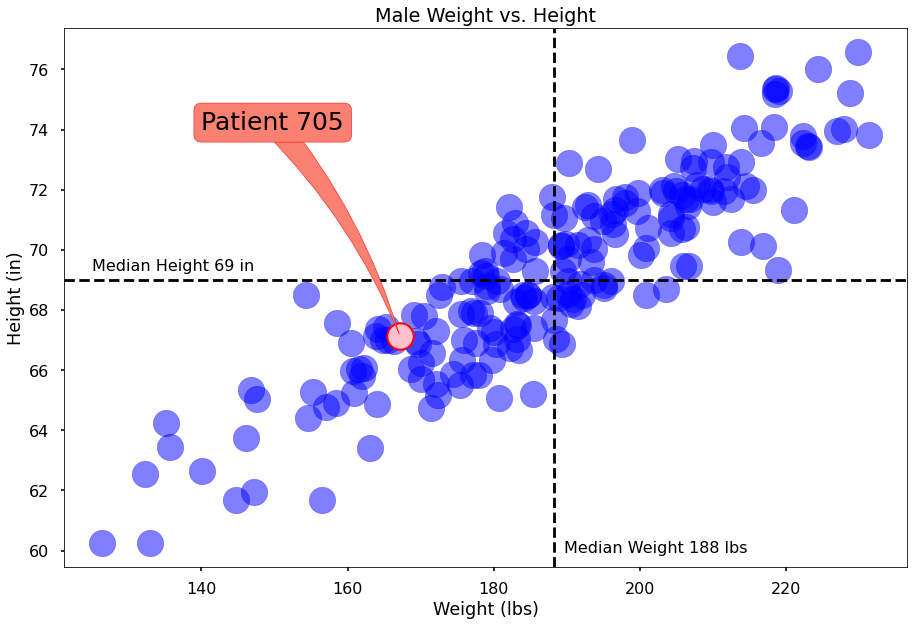

In [10]:
# plot male weight v height scatter plot highlighting single patient
plt.style.use('seaborn-poster')

plt.title('Male Weight vs. Height')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (in)')

plt.scatter(
    male_sample['Weight'], male_sample['Height'], # x, y
    color = 'blue',
    s = 700, # size
    alpha = 0.5
)

plt.scatter(
    patient['Weight'], patient['Height'],
    color = 'pink',
    s = 700,
    alpha = 1.0,
    edgecolor = 'red',
    linewidth = 2
)

# plt.scatter(
#     patient['Weight'], patient['Height'],
#     marker = 'x',
#     color = 'red',
#     s = 250,
#     alpha = 1.0,
#     edgecolor = 'black',
#     linewidth = 2
# )

# dynamic text for median weight
plt.axvline(x = median_weight, color = 'black', linestyle = '--')
plt.annotate(
    text = f"Median Weight {round(median_weight)} lbs", 
    xy = (median_weight, min_height), 
    xytext = (10, -10), 
    textcoords = 'offset pixels', 
    fontsize = 16
)

# dynamic text for median height
plt.axhline(y = median_height, color = 'black', linestyle = '--')
plt.annotate(
    text = f"Median Height {round(median_height)} in", 
    xy = (min_weight, median_height), 
    xytext = (-10, 10), 
    textcoords = 'offset pixels', 
    fontsize = 16
)

# annotate to call out single patient
plt.annotate(
    text = 'Patient 705',
    xy = (patient['Weight'], patient['Height']),
    xytext = (140, 74),
    fontsize = 25,
    bbox = dict(boxstyle = 'round', fc = 'salmon', ec = 'red'),
    arrowprops = dict(arrowstyle = 'wedge, tail_width = 1.', fc = 'salmon', ec = 'red', patchA = None, connectionstyle = 'arc3, rad = -0.1')   
)


plt.tight_layout()
plt.savefig(fname = 'exported_plot.png') # specify path if not saving to working directory
plt.show()